## **Pre-Procesamiento de datos**

#### Librerías

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

#### *Exploración del dataset*

In [29]:
# import dataset
df = pd.read_csv('./aoe_data.csv')
df.head()

,match_uid,match_id,map,map_size,duration,dataset,difficulty,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
0,50453403,50453403,Arabia,Tiny,3445,Definitive Edition,Hardest,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0
1,118982970,118982970,Arena,Tiny,2932,Definitive Edition,Hardest,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0
2,57185801,57185801,Arena,Tiny,2573,Definitive Edition,Hardest,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0
3,64335748,64335748,Arabia,Tiny,851,Definitive Edition,Hardest,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1
4,116883036,116883036,Arabia,Tiny,4737,Definitive Edition,Hardest,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1


<AxesSubplot: >

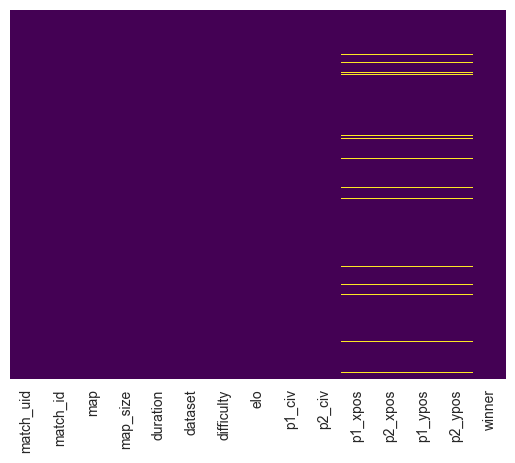

In [30]:
# check for missing values

sns.set_style('darkgrid')
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

* _Existen múltiples datos faltantes en el dataset, por lo que se procede a explorar los valores de esas variables_
* _Para hacer la codificación de las diferentes variables del dataset, se debe hacer una exploración de cuáles son categóricas y cuáles numéricas_

In [31]:
# Check the data types of each column
column_types = df.dtypes

# Identify the quantitative and categorical columns
quantitative_columns = column_types[column_types != 'object'].index.tolist()
categorical_columns = column_types[column_types == 'object'].index.tolist()

print("Quantitative columns:", quantitative_columns)
print("Categorical columns:", categorical_columns)


Quantitative columns: ['match_uid', 'match_id', 'duration', 'elo', 'p1_xpos', 'p2_xpos', 'p1_ypos', 'p2_ypos', 'winner']
Categorical columns: ['map', 'map_size', 'dataset', 'difficulty', 'p1_civ', 'p2_civ']


Number of unique labels:  45
Arabia                138902
Arena                  25074
Four Lakes              6162
Runestones              5725
Golden Pit              4315
Nomad                   3756
African Clearing        3689
MegaRandom              3617
Hideout                 3566
Gold Rush               3459
Atacama                 2817
Socotra                 2394
Ghost Lake              2294
Acropolis               2159
Valley                  1845
Land Nomad              1727
Golden Swamp             850
Marketplace              849
Serengeti                833
Steppe                   826
Team Islands             796
Crater                   753
Land Madness             679
Mongolia                 618
Migration                581
Aftermath                565
Archipelago              561
Islands                  513
Lombardia                480
Fortress                 467
Coastal Forest           426
Baltic                   413
Lowland                  396
Haboob        

<AxesSubplot: xlabel='map', ylabel='count'>

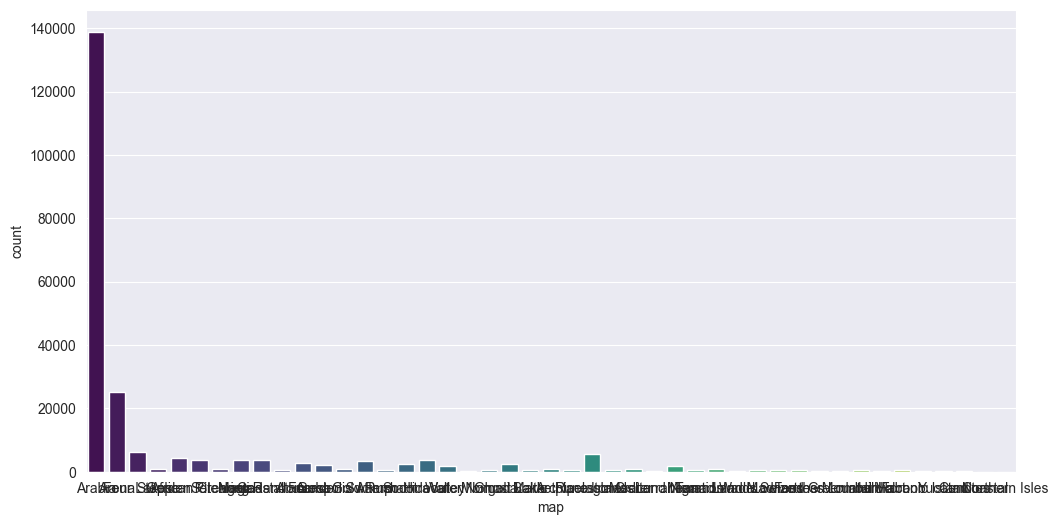

In [32]:
cols =  ['map', 'map_size', 'dataset', 'difficulty', 'p1_civ', 'p2_civ']
col = cols[0]

unique_labels = df[col].nunique()
print("Number of unique labels: ", unique_labels)
print(df[col].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(x=col, data=df, palette='viridis')

Number of unique labels:  1
Tiny    224599
Name: map_size, dtype: int64


<AxesSubplot: xlabel='map_size', ylabel='count'>

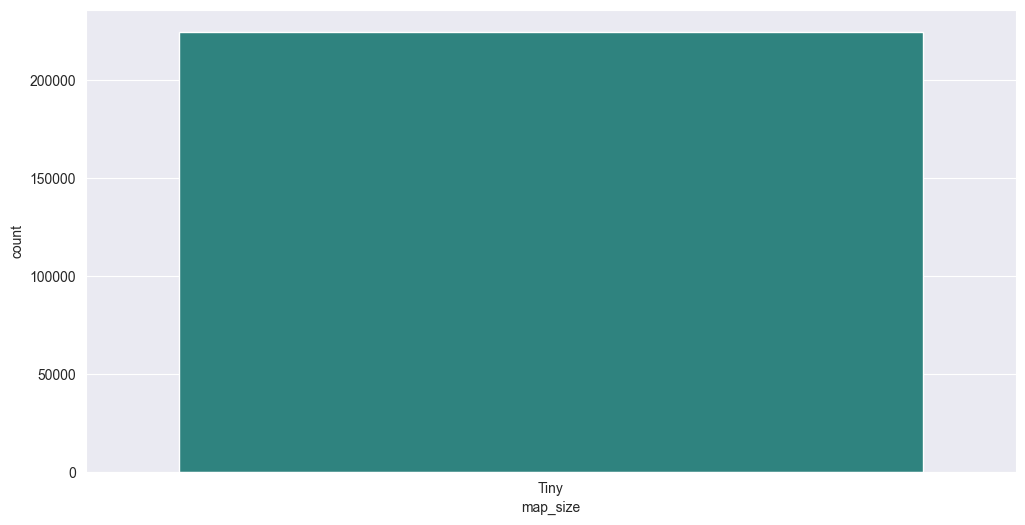

In [33]:
col = cols[1]

unique_labels = df[col].nunique()
print("Number of unique labels: ", unique_labels)
print(df[col].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(x=col, data=df, palette='viridis')


Number of unique labels:  1
Definitive Edition    224599
Name: dataset, dtype: int64


<AxesSubplot: xlabel='dataset', ylabel='count'>

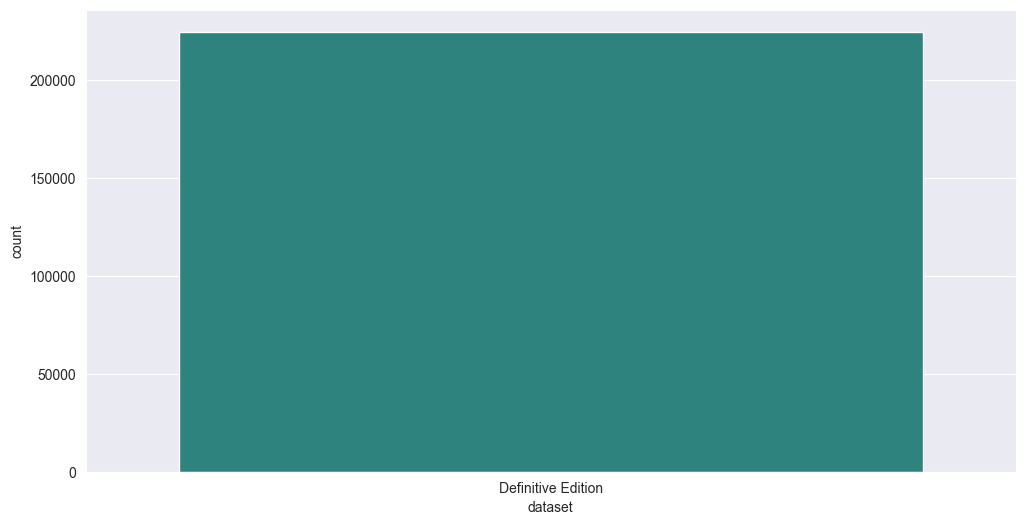

In [34]:
col = cols[2]

unique_labels = df[col].nunique()
print("Number of unique labels: ", unique_labels)
print(df[col].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(x=col, data=df, palette='viridis')

Number of unique labels:  1
Hardest    224599
Name: difficulty, dtype: int64


<AxesSubplot: xlabel='difficulty', ylabel='count'>

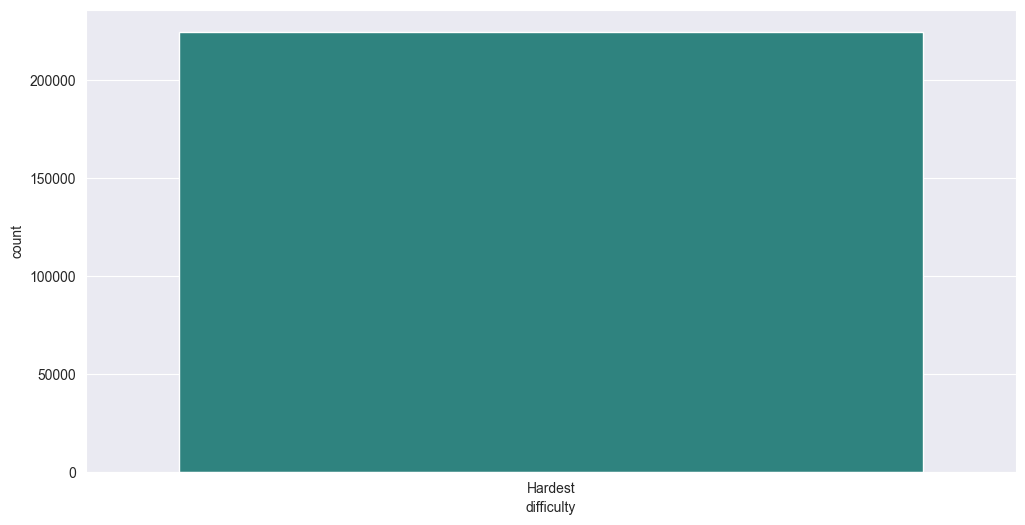

In [35]:
col = cols[3]

unique_labels = df[col].nunique()
print("Number of unique labels: ", unique_labels)
print(df[col].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(x=col, data=df, palette='viridis')

Number of unique labels:  39
Franks         22117
Britons        12942
Mayans         11879
Magyars        10883
Ethiopians     10680
Mongols        10526
Lithuanians     9195
Huns            7527
Vikings         7288
Goths           7057
Bulgarians      6777
Aztecs          6056
Teutons         5455
Japanese        5231
Persians        5164
Berbers         5125
Khmer           5082
Chinese         5040
Cumans          4991
Celts           4958
Byzantines      4620
Spanish         4533
Turks           4313
Vietnamese      4236
Tatars          4225
Saracens        3441
Malians         3411
Burgundians     3357
Incas           3354
Slavs           3113
Koreans         3058
Poles           2774
Italians        2692
Indians         2628
Sicilians       2628
Malay           2560
Portuguese      2300
Burmese         2068
Bohemians       1315
Name: p1_civ, dtype: int64


<AxesSubplot: xlabel='p1_civ', ylabel='count'>

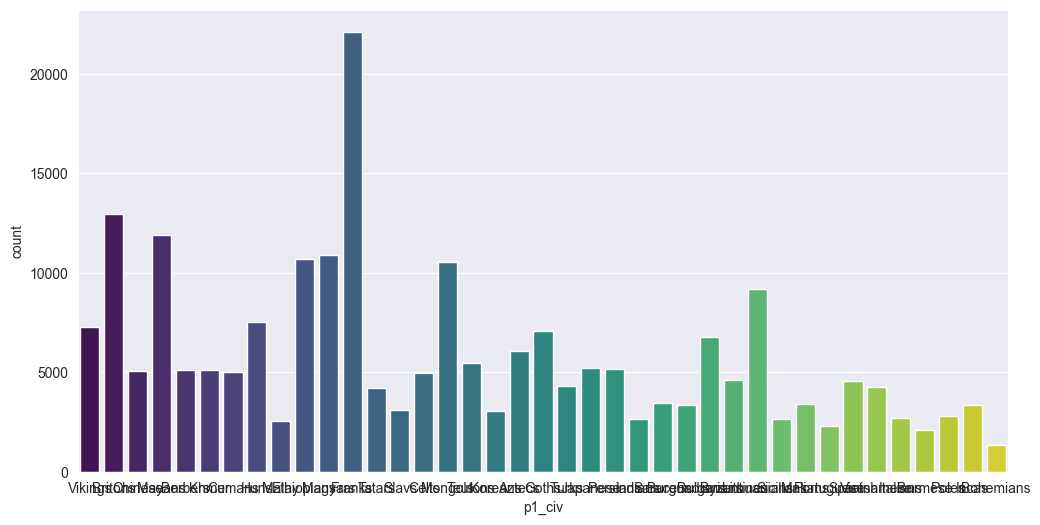

In [36]:
col = cols[4]

unique_labels = df[col].nunique()
print("Number of unique labels: ", unique_labels)
print(df[col].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(x=col, data=df, palette='viridis')

Number of unique labels:  39
Franks         22270
Britons        12804
Mayans         12356
Magyars        11282
Ethiopians     10868
Mongols        10546
Lithuanians     9411
Vikings         7380
Huns            7334
Goths           6969
Bulgarians      6689
Aztecs          6039
Teutons         5327
Chinese         5176
Persians        5164
Khmer           5120
Japanese        5109
Celts           5043
Berbers         4967
Cumans          4946
Spanish         4625
Byzantines      4508
Turks           4178
Vietnamese      4156
Tatars          4105
Burgundians     3477
Malians         3400
Saracens        3317
Incas           3219
Slavs           2997
Koreans         2957
Italians        2755
Poles           2687
Sicilians       2617
Malay           2522
Indians         2511
Portuguese      2231
Burmese         2098
Bohemians       1439
Name: p2_civ, dtype: int64


<AxesSubplot: xlabel='p2_civ', ylabel='count'>

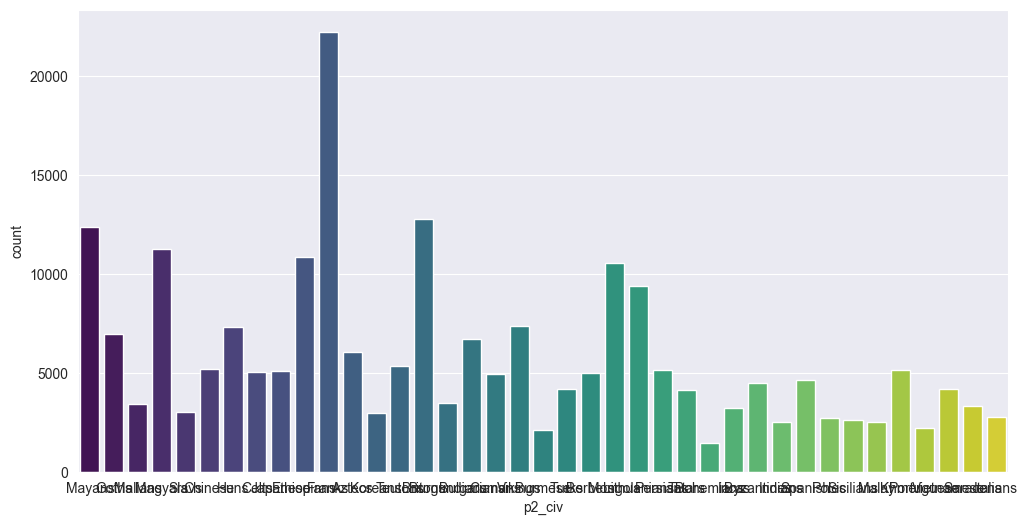

In [37]:
col = cols[5]

unique_labels = df[col].nunique()
print("Number of unique labels: ", unique_labels)
print(df[col].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(x=col, data=df, palette='viridis')

In [40]:
import pandas as pd

# Replace 'column_name' with the actual name of the column
column_labels = df[cols[0]].unique()
label_table = pd.DataFrame(column_labels, columns=['Labels'])

print(label_table)


                Labels
0               Arabia
1                Arena
2           Four Lakes
3               Steppe
4           Golden Pit
5     African Clearing
6            Serengeti
7                Nomad
8           MegaRandom
9       Coastal Forest
10             Atacama
11           Acropolis
12        Golden Swamp
13           Gold Rush
14           Aftermath
15             Socotra
16             Hideout
17              Valley
18         Water Nomad
19            Mongolia
20          Ghost Lake
21              Baltic
22         Marketplace
23         Archipelago
24          Runestones
25             Islands
26              Crater
27       Mediterranean
28          Land Nomad
29           Migration
30        Team Islands
31                Wade
32        Land Madness
33             Lowland
34            Fortress
35  Seize the Mountain
36           Greenland
37           Lombardia
38           Hill Fort
39              Haboob
40     Volcanic Island
41             Yucatan
42         

In [41]:
import pandas as pd

# Replace 'column_name' with the actual name of the column
column_labels = df[cols[4]].unique()
label_table = pd.DataFrame(column_labels, columns=['Labels'])

print(label_table)


         Labels
0       Vikings
1       Britons
2       Chinese
3        Mayans
4       Berbers
5         Khmer
6        Cumans
7          Huns
8         Malay
9    Ethiopians
10      Magyars
11       Franks
12       Tatars
13        Slavs
14        Celts
15      Mongols
16      Teutons
17      Koreans
18       Aztecs
19        Goths
20        Turks
21     Japanese
22     Persians
23      Indians
24     Saracens
25  Burgundians
26   Bulgarians
27   Byzantines
28  Lithuanians
29    Sicilians
30      Malians
31   Portuguese
32      Spanish
33   Vietnamese
34     Italians
35      Burmese
36        Poles
37        Incas
38    Bohemians


In [42]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

d2 = df.copy()

# Iterate over each categorical column
for c in cols:
    # Apply label encoding
    d2[c] = label_encoder.fit_transform(d2[c])

# Print the updated DataFrame
print(d2.head())


   match_uid   match_id  map  map_size  duration  dataset  difficulty     elo  \
0   50453403   50453403    3         0      3445        0           0  1104.0   
1  118982970  118982970    5         0      2932        0           0   884.5   
2   57185801   57185801    5         0      2573        0           0   905.5   
3   64335748   64335748    3         0       851        0           0  1080.0   
4  116883036  116883036    3         0      4737        0           0  1050.0   

   p1_civ  p2_civ  p1_xpos  p2_xpos  p1_ypos  p2_ypos  winner  
0      38      25     92.0     24.0     37.0     78.0       0  
1       3      13     70.0     82.0     16.0     98.0       0  
2       9      24     69.0     61.0     16.0    104.0       0  
3      25      22     25.0     98.0     80.0     68.0       1  
4       1      32     83.0     30.0     28.0     85.0       1  


In [46]:
import pandas as pd

# Replace 'column_name' with the actual name of the column
column_labels = d2['map'].unique()
label_table = pd.DataFrame(column_labels, columns=['Labels'])

print(label_table)

    Labels
0        3
1        5
2       13
3       38
4       16
5        1
6       36
7       32
8       29
9       10
10       6
11       0
12      17
13      15
14       2
15      37
16      20
17      40
18      43
19      31
20      14
21       7
22      27
23       4
24      34
25      22
26      11
27      28
28      24
29      30
30      39
31      42
32      23
33      26
34      12
35      35
36      18
37      25
38      21
39      19
40      41
41      44
42       8
43       9
44      33


In [45]:
import pandas as pd

# Replace 'column_name' with the actual name of the column
column_labels = d2['p1_civ'].unique()
label_table = pd.DataFrame(column_labels, columns=['Labels'])

print(label_table)

    Labels
0       38
1        3
2        9
3       25
4        1
5       19
6       10
7       14
8       23
9       11
10      22
11      12
12      34
13      32
14       8
15      26
16      35
17      20
18       0
19      13
20      36
21      18
22      27
23      16
24      30
25       5
26       4
27       7
28      21
29      31
30      24
31      29
32      33
33      37
34      17
35       6
36      28
37      15
38       2


In [44]:
import pandas as pd

# Replace 'column_name' with the actual name of the column
column_labels = d2['p2_civ'].unique()
label_table = pd.DataFrame(column_labels, columns=['Labels'])

print(label_table)

    Labels
0       25
1       13
2       24
3       22
4       32
5        9
6       14
7        8
8       18
9       11
10      12
11       0
12      20
13      35
14       3
15       5
16       4
17      10
18      38
19       6
20      36
21       1
22      26
23      21
24      27
25      34
26       2
27      15
28       7
29      16
30      33
31      28
32      31
33      23
34      19
35      29
36      37
37      30
38      17
